In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

In [68]:
data = pd.read_csv("Fraude en TC/fraude_tc.csv")
data =  pd.DataFrame(data)
print("El dataset posee {} filas y {} columnas".format(data.shape[0], data.shape[1]))
data.head()

El dataset posee 1000000 filas y 8 columnas


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# EDA

**DESCRIPCIÓN DE LOS DATOS**

Significado de cada columna

- distance_from_home: la distancia a la que la transacción ocurrió desde la dirección de facturación
- distance_from_last_transaction: la distancia de la última transacción
- ratio_to_median_purchase_price: ratio de el monto de transacción sobre la mediana 
- repeat_retailer: si la transacción se dió sobre un retailer repetido
- used_chip: si la transacción es por chip
- used_pin_number: si la transacción es por PIN
- online_order: si la transacción es online
- fraud: si la transacción fue o no fraudulenta


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [70]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Manejo de NOISE DATA

### Missing Values

Comprobar los datos duplicados

In [71]:
if data.duplicated().sum() > 0:
      print('Existen datos duplicados')
else:
  print('No existen datos duplicados')

No existen datos duplicados


Calculamos el número total de valores nulos:

In [72]:
print('El número total de valores nulos es:', data.isnull().sum().sum())

El número total de valores nulos es: 0


Se comprueba si hay un valor inapropiado en los datos booleanos

In [73]:
boolean_features = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]

In [74]:
for feature in boolean_features:
    print(f"Valores únicos de: {feature}")
    print(data[feature].unique())

Valores únicos de: repeat_retailer
[1. 0.]
Valores únicos de: used_chip
[1. 0.]
Valores únicos de: used_pin_number
[0. 1.]
Valores únicos de: online_order
[0. 1.]
Valores únicos de: fraud
[0. 1.]


### Análisis univariado

El término análisis univariado se refiere al análisis de una variable. El propósito del análisis univariado es comprender la distribución de valores para una sola variable.

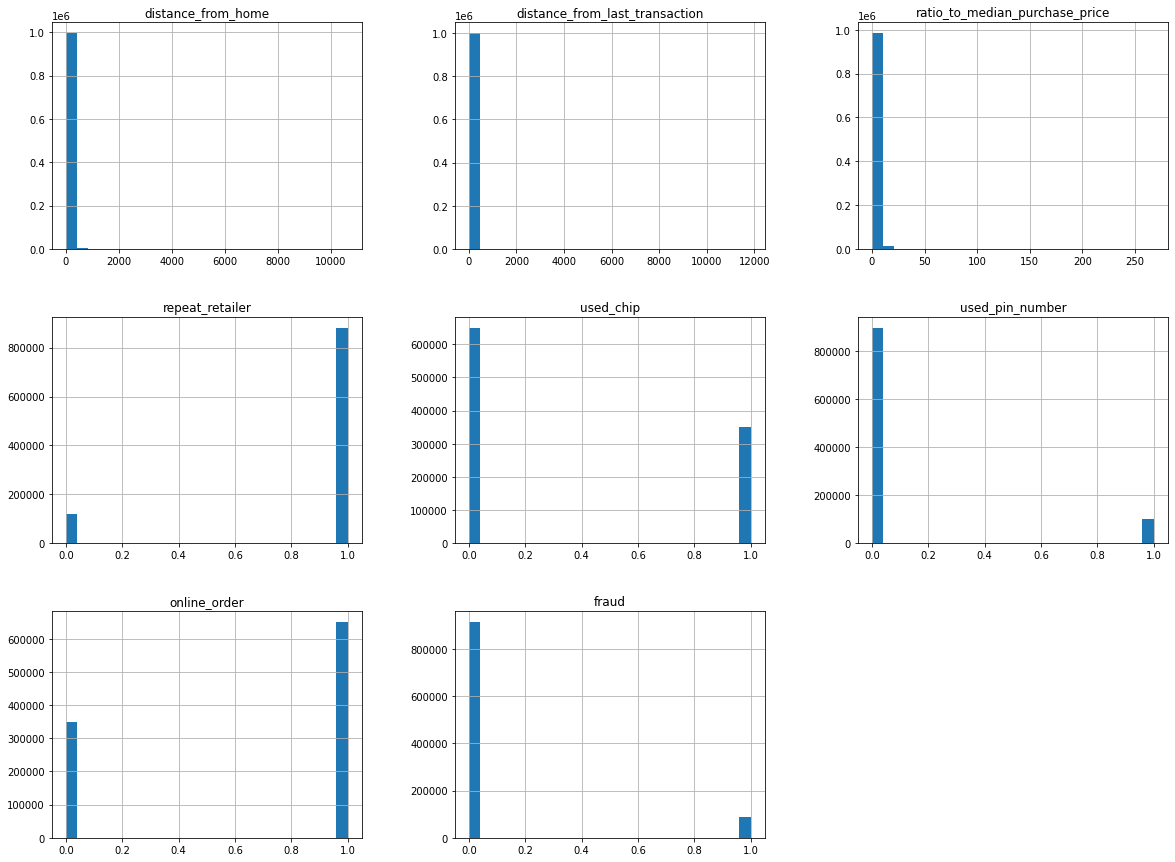

In [75]:
data.hist(bins=25, figsize=(20,15))
plt.show()

In [76]:
fraud_0 = (data['fraud'] == 0).sum()
fraud_1 = (data['fraud'] == 1).sum()
print(f"Número de veces que NO existió fraude {fraud_0} con porcentaje de: {((fraud_0/data.shape[0])*100)} %")
print(f"Numero de veces que SI existio fraude {fraud_1} con porcentaje de: {((fraud_1/data.shape[0])*100)} %")

Número de veces que NO existió fraude 912597 con porcentaje de: 91.2597 %
Numero de veces que SI existio fraude 87403 con porcentaje de: 8.7403 %


De los histogramas presentados, se puede concluir que:

- La distribución de los datos númericos continuos (distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price) se inclina a la derecha, es decir, poseen un sesgo a la derecha. Esto afecta al modelo, por tal motivo sera necesario estandarizarlo a futuro.
- El número de ocurrencias es muy desequilibrado, siendo pocos los fraudes por lo que es mejor hacer submuestreo.

## Submuestreo

Se hará el submuestreo. Se usará "Random Under Sampling" eliminando los datos de clase mayoritaria para que la distribución de los datos pueda ser más equilibrada

**Dividir los datos para el submuestreo** 

Antes del submuestreo, primero se separa el campo "Fraud" del marco de datos original. Esto se hace porque más adelante, durante la evaluación del modelo, probaré el modelo con el marco de datos original, no con el marco de datos creado con la técnica de submuestreo. El objetivo es ajustar el modelo al marco de datos antes de que se muestree por debajo o por encima de la muestra y pueda detectar patrones mejor.

In [77]:
X = data.drop('fraud', axis=1)
y = data['fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

###  Random Under Sampling

In [78]:
df = data.sample(frac=1)
fraud_df = df.loc[df['fraud'] == 1]
non_fraud_df = df.loc[df['fraud'] == 0][:fraud_1]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
518506,17.462905,2.579763,9.006280,1.0,1.0,0.0,1.0,1.0
282940,198.747990,1.183391,1.906804,1.0,0.0,0.0,1.0,1.0
296502,6.139968,8.375703,0.354408,1.0,1.0,0.0,1.0,0.0
5715,2.359905,0.067936,0.363513,1.0,0.0,0.0,1.0,0.0
840092,13.242034,2.670510,1.495754,1.0,1.0,0.0,1.0,0.0


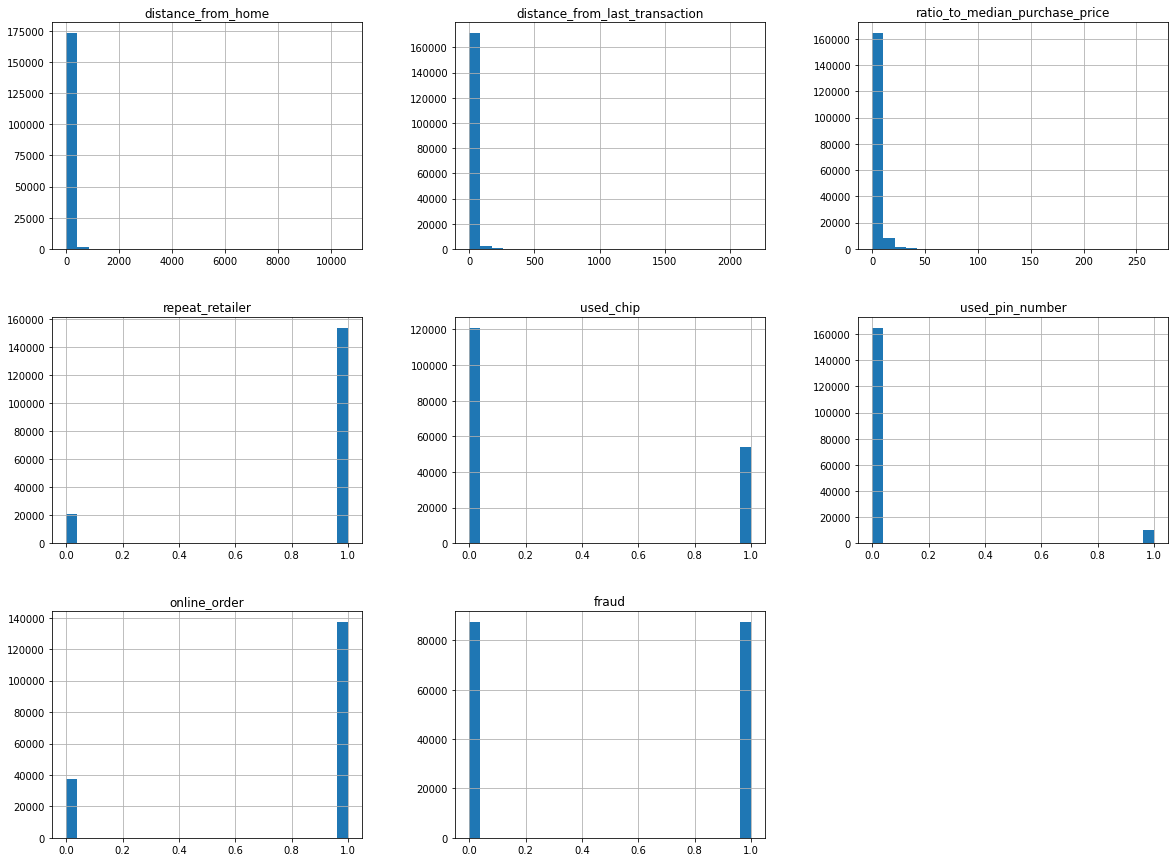

In [79]:
new_df.hist(bins=25, figsize=(20,15))
plt.show()

Ahora que la distribución de los datos de fraude está equilibrada, se realiza una limpieza adicional de los datos eliminando los outliers.

### Manejo de Outliers

<AxesSubplot:xlabel='distance_from_last_transaction'>

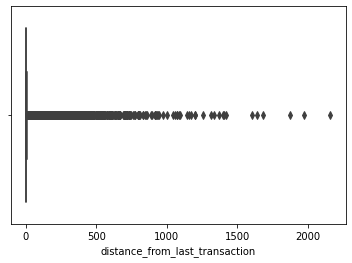

In [80]:
data_numeric = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]

sns.boxplot(x = new_df["distance_from_last_transaction"])

<AxesSubplot:xlabel='distance_from_home'>

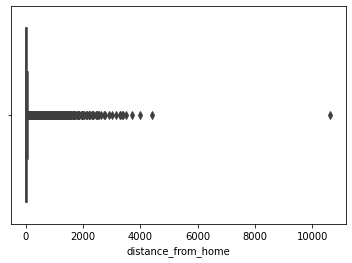

In [82]:
sns.boxplot(x = new_df["distance_from_home"])

<AxesSubplot:xlabel='ratio_to_median_purchase_price'>

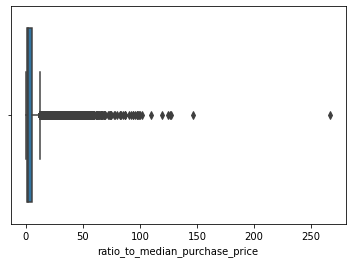

In [83]:
sns.boxplot(x = new_df["ratio_to_median_purchase_price"])

De los diagrama de cajas, se puede obtener información de que hay algunos valores que están demasiado alejados de la distribución normal de valores. Por eso solo se omitirá los últimos valores (del último cuantil) para que la distribución de los valores pueda ser mejor y no se elimine demasiados datos. Se usará un límite inferior a partir del cuantil=0 y un límite superior en el cuantil=0,99.

In [84]:
Q1 = new_df.quantile(0)
Q3 = new_df.quantile(0.99)
IQR=Q3-Q1
new_df=new_df[~((new_df<(Q1-1.5*IQR))|(new_df>(Q3+1.5*IQR))).any(axis=1)]
 
# tamaño del conjunto de datos después de eliminar los valores atípicos
new_df.shape

(174158, 8)

### Analisis Multivariado

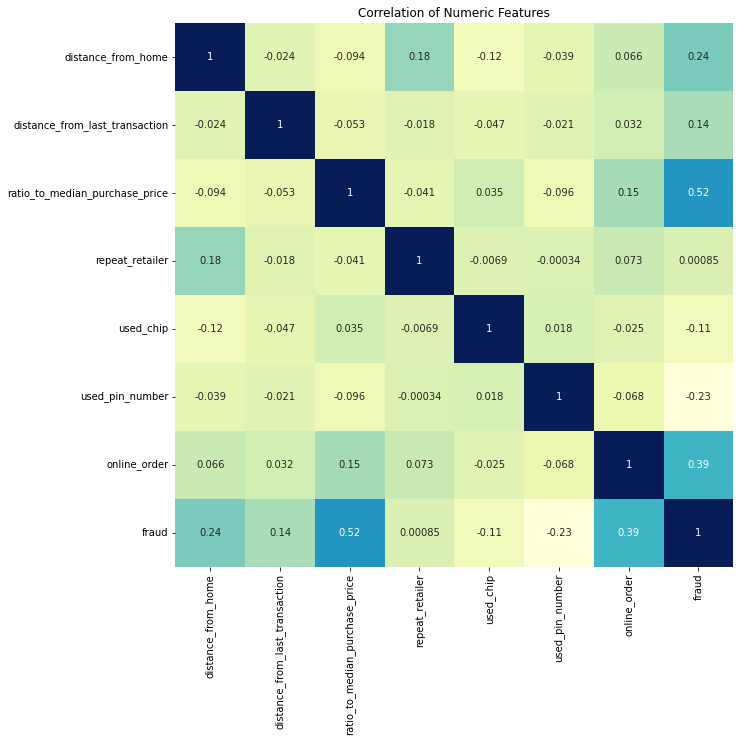

In [85]:
plt.figure(figsize=(10, 10))

sns.heatmap(new_df.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=False,
            cmap="YlGnBu",
            xticklabels=new_df.select_dtypes(np.number).columns,
            yticklabels=new_df.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()

Se observa que repeat_retailer tiene una correlación muy baja con fraude. Por lo tanto, esta se puede descartar.

In [86]:
new_df.drop(['repeat_retailer'], inplace=True, axis=1)
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
518506,17.462905,2.579763,9.006280,1.0,0.0,1.0,1.0
282940,198.747990,1.183391,1.906804,0.0,0.0,1.0,1.0
296502,6.139968,8.375703,0.354408,1.0,0.0,1.0,0.0
5715,2.359905,0.067936,0.363513,0.0,0.0,1.0,0.0
840092,13.242034,2.670510,1.495754,1.0,0.0,1.0,0.0


## Data Preparation
### Train Test Split

In [87]:
new_X = new_df.drop('fraud', axis=1)
new_y = new_df['fraud']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [88]:
x_test.drop(['repeat_retailer'], inplace=True, axis=1)

In [90]:
print(f'Total muestras en train dataset: {len(new_x_train)}')
print(f'Total muestras en test dataset: {len(new_x_test)}')

Total muestras en train dataset: 139326
Total muestras en test dataset: 34832


### Normalización

In [91]:
scaler = MinMaxScaler()
scaler.fit(new_x_train)
new_x_train = scaler.transform(new_x_train)
x_test = scaler.transform(x_test)

## Modelado 

Aquí se hará una comparación entre  dos algoritmos: 
- Naive Bayes
- Logistic Regression

### Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(new_x_train, new_y_train)
model_bayes = bayes.predict(x_test)

### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression()
lr.fit(new_x_train, new_y_train)
model_lr = lr.predict(x_test)

## Evaluacion de Modelos

In [94]:
def evaluate_classifier_performance(classifier, prediction, y_test = y_test, x_test = x_test):
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(x_test))))

    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93    182557
         1.0       0.42      0.97      0.59     17443

    accuracy                           0.88    200000
   macro avg       0.71      0.92      0.76    200000
weighted avg       0.95      0.88      0.90    200000


Accuracy: 0.881185
Precision Macro Average: 0.7087932273401807
Precision Micro Average: 0.881185
Recall Macro Average: 0.9201902935135055
Recall Micro Average: 0.881185
F1 Macro Average: 0.7587200965415937
F1 Micro Average: 0.8811849999999999


Confusion Matrix



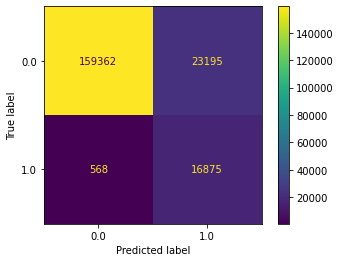

In [95]:
evaluate_classifier_performance(bayes, model_bayes)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.57      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000


Accuracy: 0.934245
Precision Macro Average: 0.7846678709101592
Precision Micro Average: 0.934245
Recall Macro Average: 0.9431885222610957
Recall Micro Average: 0.934245
F1 Macro Average: 0.8397897471445417
F1 Micro Average: 0.934245


Confusion Matrix



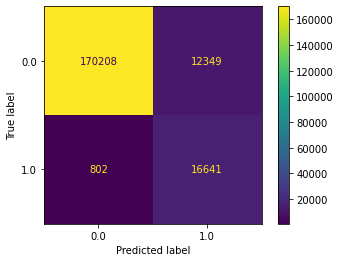

In [96]:
evaluate_classifier_performance(lr, model_lr)